# Give Life: Predict Blood Donations
## Machine Learning Projects

## 0. Defining the main purpose

The main purpose of this project guided by Datacamp is build to forecast blood supply through an machine learning supervised algorithm. This code has only academic goals because is a recurrent problem for health institutes.

On the other hand, this dataset and its metadata is available in Datacamp and  UCI - Machine Learning repository (University of California, Irvine):

https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/

## 1. Inspecting transfusion.data file
<p><img src="https://assets.datacamp.com/production/project_646/img/blood_donation.png" style="float: right;" alt="A pictogram of a blood bag with blood donation written in it" width="200"></p>
<p>Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to <a href="https://www.webmd.com/a-to-z-guides/blood-transfusion-what-to-know#1">WebMD</a>, "about 5 million Americans need a blood transfusion every year".</p>
<p>Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.</p>
<p>The data is stored in <code>datasets/transfusion.data</code> and it is structured according to RFMTC marketing model (a variation of RFM). We'll explore what that means later in this notebook. First, let's inspect the data.</p>

## 1.1 About dataset and shell commands

For this code version, I have been transformed the original dataset in excel format for easy treat and functional convenience (I don't use the Shell commands yet!, I know some code lines), in my Github repository will be availabe this Python file and the dataset, in the same way in the references of this exercise.

# 2. Exploratory Data Analysis (EDA)

Now, I'll import the respective package:

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import seaborn as sns

Previously, I should look at the big picture in general and a bit of basic statistics and a sample of the data:

In [2]:
df_transfusion = pd.read_excel('data_transfusion.xlsx')
df_transfusion.head(5)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
df_transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [4]:
df_transfusion.shape

(748, 5)

In [5]:
df_transfusion.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

With the next function of dataset, I can review that datatypes are numerical values (this step is important to verify the data quality for later train the supervised algorithm)

In [6]:
df_transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


For the regressors, its datatypes is non-empty: 

In [7]:
df_transfusion.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

Now, I'll use the method hist() for visualize a histogram for each numerical column:

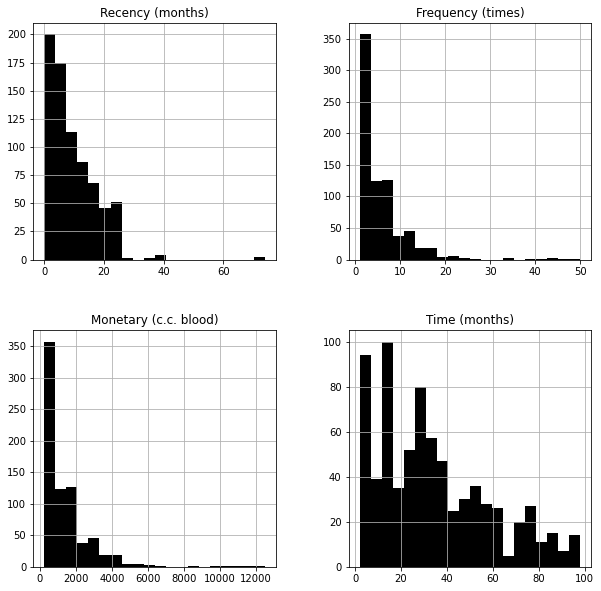

In [8]:
df_transfusion.drop('whether he/she donated blood in March 2007', axis=1).hist(bins=20, figsize=(10,10), color='black')
plt.show()

What's the percentage of each type of the target variable?

In [9]:
df_transfusion['whether he/she donated blood in March 2007'].value_counts(normalize=True).round(2)

0    0.76
1    0.24
Name: whether he/she donated blood in March 2007, dtype: float64

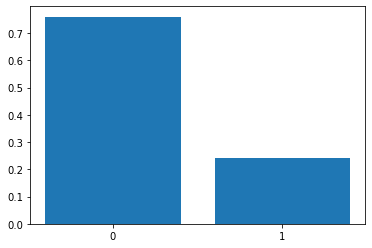

In [10]:
plt.bar(['0', '1'],df_transfusion['whether he/she donated blood in March 2007'].value_counts(normalize=True).round(2))
plt.show()


This last values, confirm that there is an imbalance between two classes.

# 3 Creating the target variable and train-test datasets

Now, the main purpose is predict ..........

Let us rename this target variable to "target":

In [11]:
df_transfusion.rename(columns = {"whether he/she donated blood in March 2007" : "target"}, inplace=True)


In [12]:
df_transfusion.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'target'],
      dtype='object')

Then, I'm going to use the train_test_split method to split our dataframe with the particularity of "Stratify" parameter because is a way for treat this great imbalance in the distribution of target variable:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_transfusion.drop(columns='target'), df_transfusion.target, test_size=0.25, random_state=42, stratify=df_transfusion.target)

## 3  Selecting model using TPOT
In my case, the next step is a new form of create pipelines with genetic programming (). The next image is from Datacamp Projects guided because is an important help for understand the benefits of TPOT package:

## 7. Selecting model using TPOT
<p><a href="https://github.com/EpistasisLab/tpot">TPOT</a> is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.</p>
<p><img src="https://assets.datacamp.com/production/project_646/img/tpot-ml-pipeline.png" alt="TPOT Machine Learning Pipeline"></p>
<p>TPOT will automatically explore hundreds of possible pipelines to find the best one for our dataset. Note, the outcome of this search will be a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">scikit-learn pipeline</a>, meaning it will include any pre-processing steps as well as the model.</p>
<p>We are using TPOT to help us zero in on one model that we can then explore and optimize further.</p>

Furthermore, in my case, I installed TPOT library with the next command:

In [14]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [15]:
from tpot import TPOTClassifier

C:\ProgramData\Anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [16]:
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7456308339276876

Best pipeline: MultinomialNB(Normalizer(input_matrix, norm=l2), alpha=0.001, fit_prior=True)

AUC score: 0.7637

Best pipeline steps:
1. Normalizer()
2. MultinomialNB(alpha=0.001)


# 4. Checking the variance and normalization

With the last result using TPOT Package is in theory the best result for the training and dataset. Nevertheless, I will check the variance for the multicollinearity among variables, if this statistical measure is high, is important make a process call Normalization. All this, with purpose of train a better model.

I quote the next definition made by Datacamp and its authors because I consider that is an important summary about Normalization:

"One of the assumptions for linear models is that the data and the features we are giving it are related in a linear fashion, or can be measured with a linear distance metric. If a feature in our dataset has a high variance that's orders of magnitude greater than the other features, this could impact the model's ability to learn from other features in the dataset.

Correcting for high variance is called normalization. It is one of the possible transformations you do before training a model. Let's check the variance to see if such transformation is needed."

In [17]:
X_train.var().round(2)

Recency (months)              66.93
Frequency (times)             33.83
Monetary (c.c. blood)    2114363.70
Time (months)                611.15
dtype: float64

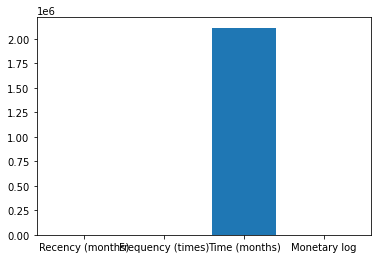

In [41]:
x0_pos_labels = np.arange(len(X_train.var()))
plt.bar(x0_pos_labels ,X_train.var())
plt.xticks(x0_pos_labels, X_train_normed.columns)
plt.show()

Now, according to these results, the Monetary's variance is very highin comparison with others variables from dataset. In the practical exercise, the log normalization is a way correct for treat this high variance:

In [18]:
#Copy from data splitted for and then  I'll select the column to normalize
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

column_to_normalize = 'Monetary (c.c. blood)'

In [20]:
#log normalization through a foor loop
for df_norm in [X_train_normed, X_test_normed]:
    #add the column:
    df_norm['Monetary log'] = np.log(df_norm[column_to_normalize])
    #drop the original column:
    df_norm.drop(columns=column_to_normalize, inplace=True)
    
#now, I review newly the variance:
X_train_normed.var()

Recency (months)      66.929017
Frequency (times)     33.829819
Time (months)        611.146588
Monetary log           0.837458
dtype: float64

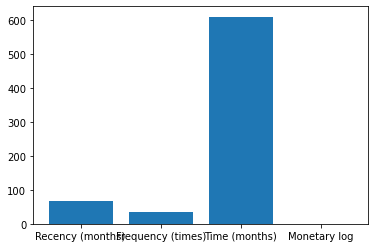

In [40]:
x_pos_labels = np.arange(len(X_train_normed.var()))
plt.bar(x_pos_labels ,X_train_normed.var())
plt.xticks(x_pos_labels, X_train_normed.columns)
plt.show()

The above bar chart there is a particularity: The Time (months) variable has a higher variance, but its order magnitude is not higher that of the other variables

# 5 Training the model according to TPOT tool

We are ready for train the model suggested by TPOT tool: MultinomialNB (Naive Bayes) with alpha parameter equal to 0.001:

In [43]:
#Import the package and instancing the model:
from sklearn.naive_bayes import MultinomialNB

M_NaibeBayes_model = MultinomialNB(alpha=0.001)

In [46]:
#Train the model
M_NaibeBayes_model.fit(X_train_normed, y_train)

MultinomialNB(alpha=0.001)

In [47]:
#now the AUC Score
MultinomialNB_auc_score = roc_auc_score(y_test, M_NaibeBayes_model.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {MultinomialNB_auc_score:.4f}')


AUC score: 0.7638


# 6 Conclusion

Tthe blood demand have ever been a critical situation for the hospitals for attend to constant demand around the world. Save lives will always be important. In this notebook thanks to help from Datacamp projects guide I discovered the powerful tool TPOT (Package that used Genetic programming, some very interesting and before I didn't know) for built a best model with a best data quality. Regarding the model, the result of AUC Score was 76.38%, i.e. the model would have 76.38% sucess rate.

A posibilitie to retrain the model for obtain a best result and avoiding the overfitting is probably the data quality  and obtain more records. This point is based in that the TPOT tool help to find the best model with respective hyperparameters.

# References


[1] Datacamp. Project Machine Learning Guides.(2021). 

[2] University of California, Irvine.(2008).UCI Machine Learning Repository.Taken from:https://archive.ics.uci.edu/ml/index.php

[3] Felson, S.(2019). Blood Transfusion: What to Know If You Get One. Taken from 
    https://www.webmd.com/a-to-z-guides/blood-transfusion-what-to-know#1
    
[4] Wikipedia. Order of magnitude. Taken from:https://en.wikipedia.org/wiki/Order_of_magnitude

[5] Log-transformation and its implications for data analysis - 2.2. Using the log transformation to reduce variability of
    data. (2014).Changyong F., Hongyue W., Naiji L., Tian C., Hua H.,Ying L., Xin M. Taken from:   
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/








